<a href="https://colab.research.google.com/github/sanchalee19/Python-project/blob/main/Global_climate_change_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **GLOBAL CLIMATE CHANGE ANALYSIS**

## OBJECTIVE  

To analyze historical global temperature anomalies from 1880 to the present, using the NASA GISS Surface Temperature dataset, in order to identify long-term trends in global warming. The aim is to explore how global temperatures have deviated from the baseline over time, understand the patterns of seasonal and annual temperature changes, and assess the progression of global climate change. The project will include data visualization to highlight significant periods of warming and cooling, and will investigate the correlation between these anomalies and key global events or natural phenomena.

## DATASET OVERVIEW

1. Source: NASA Goddard Institute for Space Studies (GISS) Surface
Temperature Analysis (GISTEMP).

2. Time Period Covered: 1880 to the present.

3. Unit: The temperature anomalies are measured in degrees Celsius (°C).

Columns explanation:

1. Year: The calendar year of the data.

2. Jan, Feb, Mar, ... Dec: These columns represent the monthly global temperature anomalies for each respective month. For example, the number in the "Jan" column for a given year shows how much the average temperature in January deviated from the baseline for that month.

3. J-D (January to December): This column provides the average temperature anomaly for the entire year.

4. D-N (December to November): This typically represents the temperature anomaly from December of the previous year to November of the current
year.

5. DJF (December, January, February): This is the average anomaly for the winter season (Northern Hemisphere).

6. MAM (March, April, May): This column shows the average anomaly for the spring season.

7. JJA (June, July, August): The average anomaly for the summer season.

8. SON (September, October, November): This represents the average anomaly for the fall season.

Key characteristics:
1. Baseline Period: The anomalies are calculated relative to a baseline period, often 1951-1980, which is considered a period of stable climate before the significant warming observed in the late 20th and early 21st centuries.

2. Anomalies Interpretation:

*   Positive Anomalies: Indicate that the temperature for that month, season, or year was warmer than the baseline period.

*   Negative Anomalies: Indicate that the temperature was cooler than the baseline period.



## **EDA (Exploratory Data Analysis)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/GLB.Ts+dSST.csv')

In [ ]:
df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.20,-0.25,-0.09,-0.16,-0.09,-0.22,-0.20,-0.1,-0.15,-0.22,-0.22,-0.19,-0.18,***,***,-0.12,-0.17,-0.2
1,1881,-0.20,-0.15,0.02,0.04,0.07,-0.19,0.01,-0.04,-0.16,-0.22,-0.19,-0.07,-0.09,-0.1,-0.18,0.04,-0.07,-0.19
2,1882,0.16,0.14,0.05,-0.16,-0.14,-0.22,-0.16,-0.07,-0.14,-0.23,-0.17,-0.36,-0.11,-0.09,0.07,-0.08,-0.15,-0.18
3,1883,-0.29,-0.37,-0.12,-0.18,-0.18,-0.07,-0.07,-0.14,-0.22,-0.11,-0.24,-0.11,-0.18,-0.2,-0.34,-0.16,-0.1,-0.19
4,1884,-0.13,-0.08,-0.36,-0.40,-0.33,-0.35,-0.31,-0.28,-0.27,-0.25,-0.33,-0.31,-0.28,-0.27,-0.11,-0.36,-0.31,-0.28


In [ ]:
df.isna().sum()

,0
Year,0
Jan,0
Feb,0
Mar,0
Apr,0
May,0
Jun,0
Jul,0
Aug,0
Sep,0


In [ ]:
#Converting data types of all columns except Year to numeric

columns_to_convert = df.columns.drop('Year')
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    145 non-null    int64  
 1   Jan     145 non-null    float64
 2   Feb     145 non-null    float64
 3   Mar     145 non-null    float64
 4   Apr     145 non-null    float64
 5   May     145 non-null    float64
 6   Jun     145 non-null    float64
 7   Jul     145 non-null    float64
 8   Aug     144 non-null    float64
 9   Sep     144 non-null    float64
 10  Oct     144 non-null    float64
 11  Nov     144 non-null    float64
 12  Dec     144 non-null    float64
 13  J-D     144 non-null    float64
 14  D-N     143 non-null    float64
 15  DJF     144 non-null    float64
 16  MAM     145 non-null    float64
 17  JJA     144 non-null    float64
 18  SON     144 non-null    float64
dtypes: float64(18), int64(1)
memory usage: 21.6 KB


## **ANALYSIS**

### DESCRIPTIVE STATS

In [ ]:
df.describe()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,143.000000,144.000000,145.000000,144.000000,144.000000
mean,1952.000000,0.071172,0.079931,0.097448,0.070897,0.060207,0.048552,0.072207,0.062083,0.068681,0.092917,0.086319,0.060833,0.067847,0.067972,0.072292,0.076621,0.055625,0.082292
std,42.001984,0.431984,0.439726,0.444369,0.407584,0.386287,0.386510,0.368879,0.373623,0.375003,0.380119,0.389304,0.405312,0.378270,0.378716,0.416085,0.407975,0.364887,0.376851
min,1880.000000,-0.810000,-0.630000,-0.630000,-0.590000,-0.540000,-0.520000,-0.510000,-0.540000,-0.570000,-0.570000,-0.570000,-0.810000,-0.480000,-0.490000,-0.670000,-0.570000,-0.490000,-0.510000
25%,1916.000000,-0.240000,-0.230000,-0.230000,-0.240000,-0.230000,-0.240000,-0.190000,-0.212500,-0.190000,-0.200000,-0.180000,-0.210000,-0.200000,-0.210000,-0.230000,-0.250000,-0.220000,-0.190000
50%,1952.000000,0.000000,-0.030000,0.020000,-0.020000,-0.040000,-0.050000,-0.030000,-0.045000,-0.055000,0.010000,0.020000,-0.040000,-0.045000,-0.050000,-0.020000,-0.020000,-0.040000,-0.010000
75%,1988.000000,0.320000,0.390000,0.320000,0.290000,0.270000,0.250000,0.260000,0.252500,0.250000,0.260000,0.242500,0.320000,0.280000,0.285000,0.332500,0.310000,0.255000,0.265000
max,2024.000000,1.220000,1.430000,1.400000,1.320000,1.160000,1.250000,1.210000,1.190000,1.480000,1.340000,1.420000,1.350000,1.170000,1.130000,1.340000,1.290000,1.150000,1.410000


### TIME SERIES VISUALIZATION




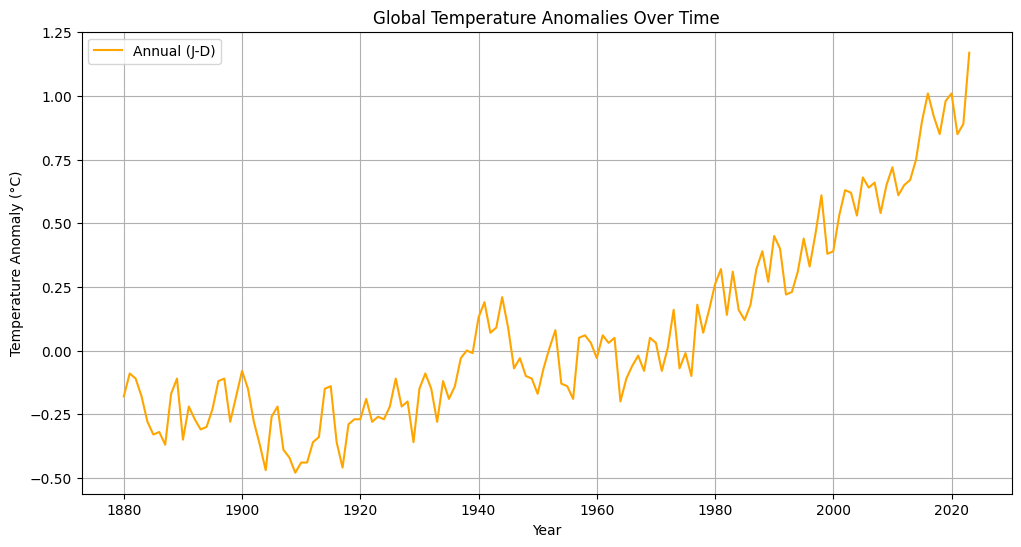

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['J-D'], label='Annual (J-D)', color='orange')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.title('Global Temperature Anomalies Over Time')
plt.legend()
plt.grid(True)
plt.show()

### SEASONAL ANALYSIS

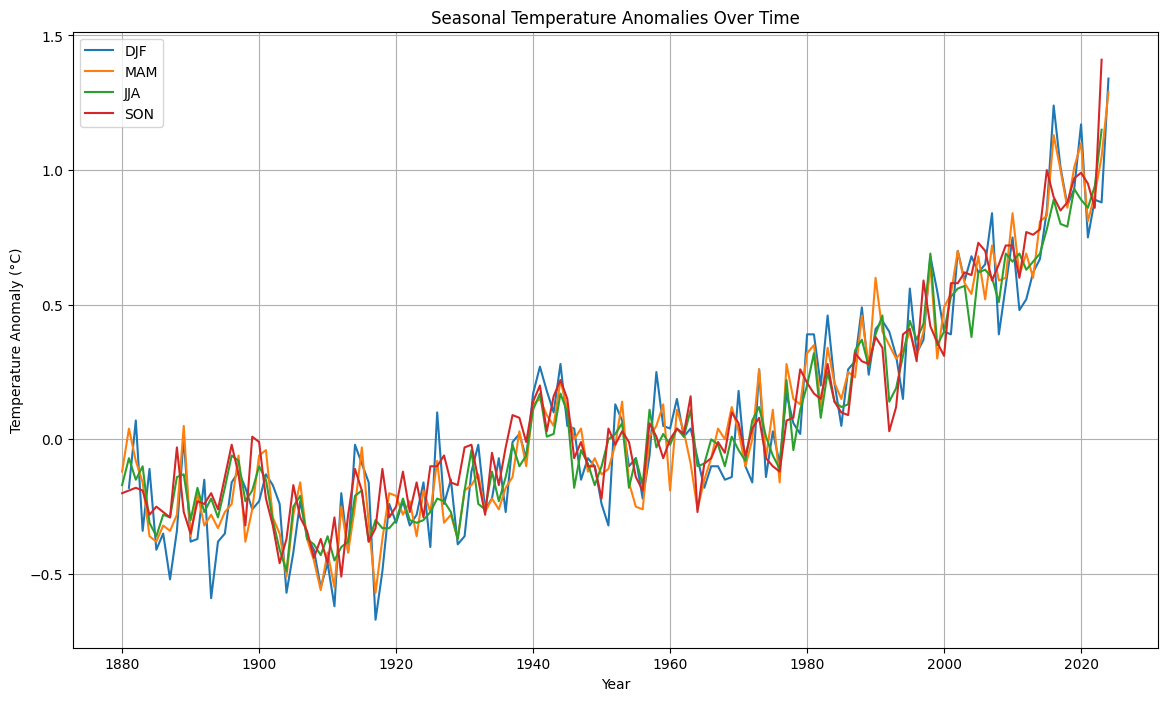

In [ ]:
plt.figure(figsize=(14,8))
seasons = ['DJF', 'MAM', 'JJA', 'SON']
for season in seasons:
    plt.plot(df['Year'], df[season], label=season)
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.title('Seasonal Temperature Anomalies Over Time')
plt.legend()
plt.grid(True)
plt.show()

### HEATMAP OF MONTHLY ANALYSIS

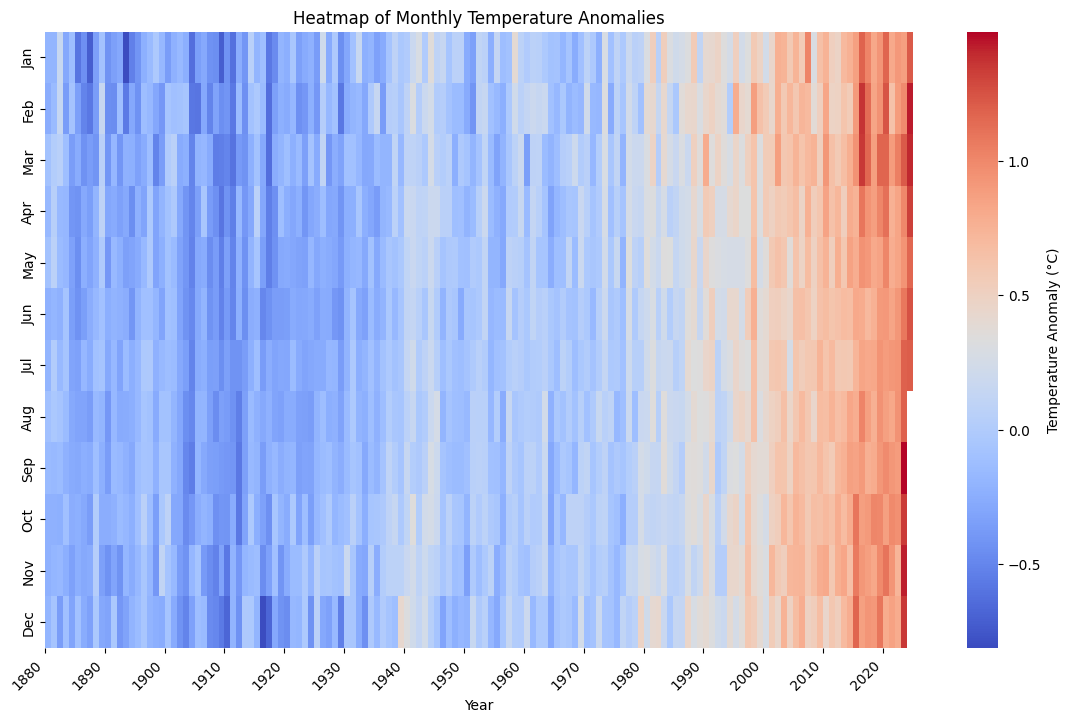

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure size
plt.figure(figsize=(14, 8))

# Create the heatmap
sns.heatmap(df.iloc[:, 1:13].T, cmap='coolwarm', cbar_kws={'label': 'Temperature Anomaly (°C)'},
            xticklabels=df['Year'], yticklabels=df.columns[1:13])

# Rotate the x-axis labels and adjust their positions
plt.xticks(ticks=range(0, len(df['Year']), 10), labels=df['Year'][::10], rotation=45, ha='right')

# Set axis labels and title
plt.xlabel('Year')
plt.title('Heatmap of Monthly Temperature Anomalies')
plt.show()


### CORRELATION MATRIX

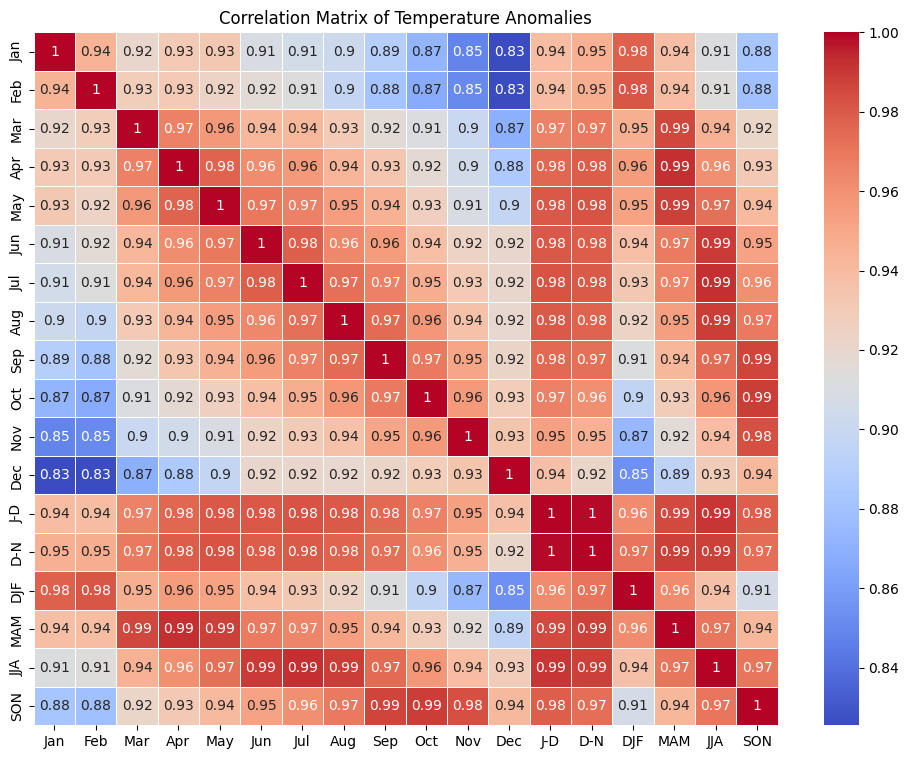

In [ ]:
plt.figure(figsize=(12, 9))
corr_matrix = df.iloc[:, 1:].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Temperature Anomalies')
plt.show()

### VIOLIN PLOT OF TEMPERATURE ANOMALIES BY DECADE

In [ ]:
df['Decade'] = (df['Year'] // 10) * 10

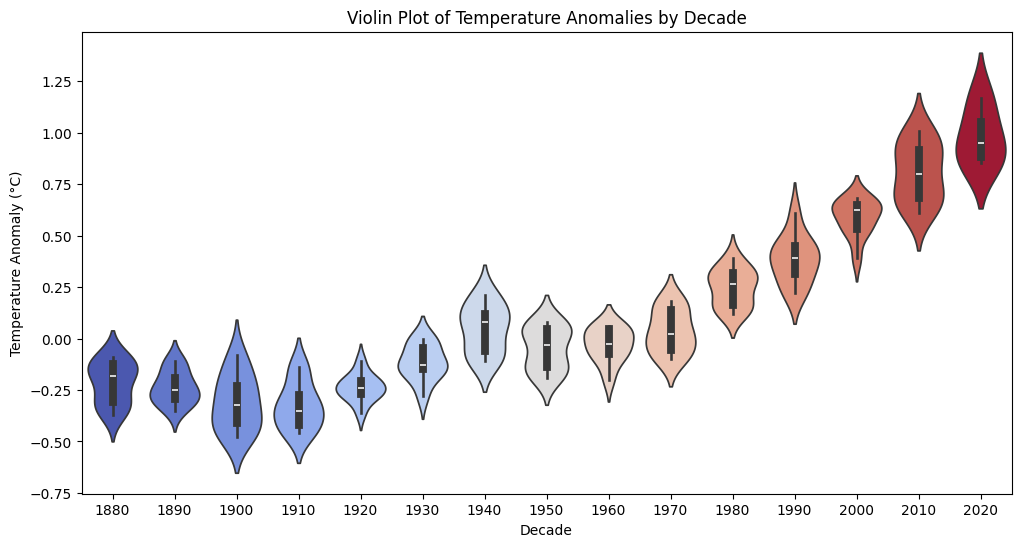

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Decade', y='J-D', data=df, palette='coolwarm', hue = 'Decade', legend = False)
plt.xlabel('Decade')
plt.ylabel('Temperature Anomaly (°C)')
plt.title('Violin Plot of Temperature Anomalies by Decade')
plt.show()

 ### SCATTER PLOT WITH TRENDLINE

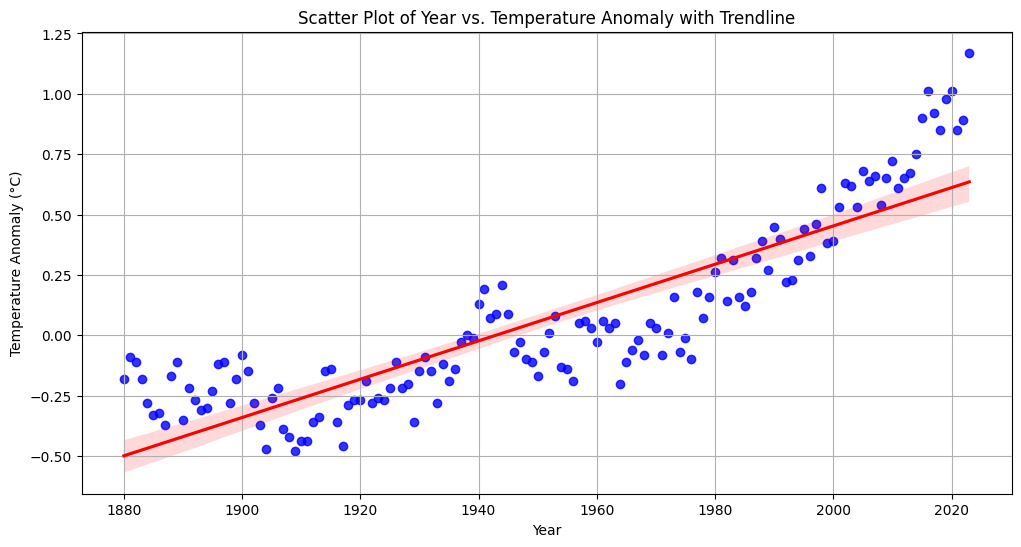

In [ ]:
plt.figure(figsize=(12, 6))
sns.regplot(x='Year', y='J-D', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.title('Scatter Plot of Year vs. Temperature Anomaly with Trendline')
plt.grid(True)
plt.show()


## **FINDINGS**

### Q1} What is the overall trend in global temperature anomalies from 1880 to the present?
--> The time series graph of the annual J-D (January to December) temperature anomalies shows an overall upward trend, indicating that global temperatures have been rising steadily over the past century. This is a clear sign of global warming, with significant increases in temperature anomalies particularly after the 1970s.

### Q2} Are there differences in temperature anomalies between different seasons? Which season shows the highest increase in anomalies?
-->The seasonal analysis graph shows the temperature anomalies for the four seasons (DJF, MAM, JJA, SON). Typically, all seasons will show an increasing trend in temperature anomalies, but you may observe that certain seasons, like summer (JJA), might exhibit higher anomalies compared to others. This indicates that certain parts of the year are warming faster than others.

### Q3} How have temperature anomalies varied on a monthly basis over the years? Are there specific months that show more significant anomalies?
--> The heatmap provides a visual representation of monthly temperature anomalies across years. You might notice that certain months (e.g., July and August) show consistently higher anomalies in recent decades. The heatmap helps identify patterns, such as specific periods with more pronounced warming or cooling.

### Q4} What is the relationship between temperature anomalies of different months or seasons?
--> The correlation matrix reveals how temperature anomalies in one month or season correlate with those in others. Typically, you would expect strong positive correlations between consecutive months or within a season, indicating that if one month or season is warmer than average, the adjacent months or seasons are likely to be warmer as well.

### Q5} How has the distribution of temperature anomalies changed across different decades? Are recent decades experiencing higher anomalies?
--> The violin plot shows the distribution of temperature anomalies for each decade. Typically, you'll observe a shift in the distribution towards higher anomalies in recent decades, with possibly more spread or skewness in the distribution, indicating increased variability or extreme temperature events.

### Q6}  Is there a clear trend in temperature anomalies over the years? What is the relationship between time and temperature anomalies?
-->The scatter plot with a trendline shows the relationship between years and temperature anomalies. A positive slope in the trendline indicates a clear warming trend, suggesting that temperature anomalies have increased over time. This visualization is useful for quantitatively assessing the rate of change.

## FURTHER RESEARCH

1. Regional Temperature Analysis: Expand the analysis to include regional temperature data to understand how different parts of the world are experiencing climate change. Investigate regional patterns, and compare them to global trends to identify areas that are warming faster or slower than the global average.
2. Impact of Specific Factors on Anomalies: Research the impact of specific factors, such as greenhouse gas emissions, deforestation, and industrial activity, on temperature anomalies. Conduct a correlation analysis to see how closely these factors align with temperature changes over time.
3. Extreme Weather Events: Investigate the relationship between temperature anomalies and the frequency and intensity of extreme weather events, such as heatwaves, hurricanes, and droughts. Determine if periods with higher anomalies correspond with more extreme weather, which can have significant socio-economic impacts.

## ACTIONABLE INSIGHTS

1. Mitigation Strategies: The consistent upward trend in global temperature anomalies highlights the urgent need for implementing and enhancing mitigation strategies to reduce greenhouse gas emissions. This could include promoting renewable energy, enhancing energy efficiency, and adopting carbon capture technologies.
2. Climate Policy Development: Policymakers should consider the long-term trends in temperature anomalies when developing climate policies. The data supports the need for stronger international agreements and regulations to limit global warming to 1.5°C or 2°C above pre-industrial levels, as per the Paris Agreement.
3. Public Awareness and Education:Use the findings from the temperature anomaly analysis to raise public awareness about the realities of climate change. Educational campaigns can leverage visualizations and trends to communicate the urgency of taking action to the broader public.
4. Adaptation Planning: Given the evidence of increasing temperature anomalies, it's essential for governments and communities to develop adaptation plans. This includes infrastructure improvements to handle more extreme weather, water management strategies, and agricultural practices that can cope with changing climate conditions.